# Import libraries

In [1]:
import os

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence # это средство борьбы с 
from torch.utils.data import DataLoader, Dataset

from tqdm import tqdm  # For nice progress bar!
import matplotlib.pyplot as plt

# Download data

In [2]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, caption_file, preprocessing=True):
        self.root_dir = root_dir
        self.df = pd.read_parquet(caption_file)
            
        
        self.rating = self.df['rating']
        self.id_movie = self.df['movieId']
        self.id_user = self.df['userId']
        self.captions = np.array(self.df[['user_encode','movie_encode','user_mean_encode','movie_mean_encode','user_std_encode', 'movie_std_encode']])
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        encode_text = pad_sequence([torch.tensor(x, dtype=torch.float) for x in self.captions[index]])
        rating_value = torch.tensor(self.rating[index], dtype=torch.float)
        index_movie = self.id_movie[index]
        index_user = self.id_user[index]
  
        return encode_text, rating_value, int(index_movie), int(index_user)

In [3]:
dataset = CustomDataset(".", "BERT_encoded_and_stat_features.parquet")
for idx, (encode_text, rating_value, id_movie, id_user) in enumerate(dataset):
    print(encode_text.shape)
    print(rating_value)
    print(id_movie)
    print(id_user)

torch.Size([947, 6])
tensor(4.5000)
1
14
torch.Size([947, 6])
tensor(5.)
1
27
torch.Size([947, 6])
tensor(4.)
1
42
torch.Size([947, 6])
tensor(2.5000)
1
56
torch.Size([947, 6])
tensor(4.5000)
1
107
torch.Size([947, 6])
tensor(5.)
1
134
torch.Size([947, 6])
tensor(3.)
1
147
torch.Size([947, 6])
tensor(3.5000)
1
166
torch.Size([947, 6])
tensor(1.5000)
1
268
torch.Size([947, 6])
tensor(3.)
1
292
torch.Size([947, 6])
tensor(4.)
1
295
torch.Size([947, 6])
tensor(4.)
1
302
torch.Size([947, 6])
tensor(2.)
1
321
torch.Size([947, 6])
tensor(0.5000)
1
339
torch.Size([947, 6])
tensor(5.)
1
344
torch.Size([947, 6])
tensor(4.)
1
369
torch.Size([947, 6])
tensor(3.)
1
412
torch.Size([947, 6])
tensor(3.5000)
1
414
torch.Size([947, 6])
tensor(2.5000)
1
447
torch.Size([947, 6])
tensor(3.5000)
1
466
torch.Size([947, 6])
tensor(4.)
1
505
torch.Size([947, 6])
tensor(4.)
1
525
torch.Size([947, 6])
tensor(4.5000)
1
540
torch.Size([947, 6])
tensor(3.)
1
601
torch.Size([947, 6])
tensor(4.)
1
629
torch.Size([94

torch.Size([947, 6])
tensor(3.5000)
32
1980
torch.Size([947, 6])
tensor(5.)
32
2014
torch.Size([947, 6])
tensor(4.)
32
2020
torch.Size([947, 6])
tensor(3.5000)
32
2069
torch.Size([947, 6])
tensor(5.)
32
2150
torch.Size([947, 6])
tensor(4.)
32
2160
torch.Size([947, 6])
tensor(5.)
32
2168
torch.Size([947, 6])
tensor(4.5000)
32
2212
torch.Size([947, 6])
tensor(5.)
32
2224
torch.Size([947, 6])
tensor(3.)
32
2230
torch.Size([947, 6])
tensor(4.)
32
2374
torch.Size([947, 6])
tensor(3.)
32
2620
torch.Size([947, 6])
tensor(3.)
32
2629
torch.Size([947, 6])
tensor(4.)
32
2700
torch.Size([947, 6])
tensor(5.)
32
2720
torch.Size([947, 6])
tensor(4.)
32
2768
torch.Size([947, 6])
tensor(4.5000)
32
2836
torch.Size([947, 6])
tensor(4.5000)
32
2866
torch.Size([947, 6])
tensor(4.)
32
2867
torch.Size([947, 6])
tensor(3.5000)
32
2892
torch.Size([947, 6])
tensor(4.5000)
32
3006
torch.Size([947, 6])
tensor(4.)
32
3133
torch.Size([947, 6])
tensor(3.)
32
3144
torch.Size([947, 6])
tensor(3.5000)
32
3220
torch.Si

tensor(3.)
89
6278
torch.Size([947, 6])
tensor(3.)
89
6299
torch.Size([947, 6])
tensor(2.)
89
6336
torch.Size([947, 6])
tensor(3.5000)
89
6658
torch.Size([947, 6])
tensor(2.)
92
2629
torch.Size([947, 6])
tensor(2.)
92
3298
torch.Size([947, 6])
tensor(2.)
92
4215
torch.Size([947, 6])
tensor(3.)
92
6264
torch.Size([947, 6])
tensor(1.5000)
92
6278
torch.Size([947, 6])
tensor(3.)
93
134
torch.Size([947, 6])
tensor(2.5000)
93
601
torch.Size([947, 6])
tensor(3.)
93
2629
torch.Size([947, 6])
tensor(1.5000)
93
5948
torch.Size([947, 6])
tensor(2.5000)
93
6884
torch.Size([947, 6])
tensor(5.)
93
7042
torch.Size([947, 6])
tensor(1.)
93
7263
torch.Size([947, 6])
tensor(2.)
94
4796
torch.Size([947, 6])
tensor(2.)
94
5323
torch.Size([947, 6])
tensor(4.)
94
6275
torch.Size([947, 6])
tensor(2.5000)
94
6762
torch.Size([947, 6])
tensor(3.5000)
95
134
torch.Size([947, 6])
tensor(2.5000)
95
277
torch.Size([947, 6])
tensor(3.)
95
295
torch.Size([947, 6])
tensor(3.)
95
526
torch.Size([947, 6])
tensor(3.5000)

tensor(3.5000)
163
6275
torch.Size([947, 6])
tensor(3.5000)
163
6278
torch.Size([947, 6])
tensor(3.)
163
6299
torch.Size([947, 6])
tensor(3.5000)
163
6631
torch.Size([947, 6])
tensor(3.)
163
6658
torch.Size([947, 6])
tensor(4.)
163
6703
torch.Size([947, 6])
tensor(4.)
163
6859
torch.Size([947, 6])
tensor(5.)
163
6869
torch.Size([947, 6])
tensor(4.)
163
6884
torch.Size([947, 6])
tensor(4.5000)
163
6936
torch.Size([947, 6])
tensor(2.5000)
164
332
torch.Size([947, 6])
tensor(3.)
164
2150
torch.Size([947, 6])
tensor(3.)
164
2629
torch.Size([947, 6])
tensor(3.)
164
3962
torch.Size([947, 6])
tensor(3.5000)
164
4311
torch.Size([947, 6])
tensor(3.5000)
164
4605
torch.Size([947, 6])
tensor(2.5000)
164
4796
torch.Size([947, 6])
tensor(3.)
164
5012
torch.Size([947, 6])
tensor(2.5000)
164
5335
torch.Size([947, 6])
tensor(4.)
164
6299
torch.Size([947, 6])
tensor(4.)
165
134
torch.Size([947, 6])
tensor(1.)
165
268
torch.Size([947, 6])
tensor(2.5000)
165
332
torch.Size([947, 6])
tensor(2.5000)
165
33

torch.Size([947, 6])
tensor(3.5000)
235
5948
torch.Size([947, 6])
tensor(3.)
235
6264
torch.Size([947, 6])
tensor(4.5000)
235
6274
torch.Size([947, 6])
tensor(4.5000)
235
6275
torch.Size([947, 6])
tensor(4.)
235
6278
torch.Size([947, 6])
tensor(5.)
235
6299
torch.Size([947, 6])
tensor(3.5000)
235
6336
torch.Size([947, 6])
tensor(4.)
235
6658
torch.Size([947, 6])
tensor(3.)
235
6691
torch.Size([947, 6])
tensor(4.)
235
6703
torch.Size([947, 6])
tensor(3.)
235
6859
torch.Size([947, 6])
tensor(4.)
235
6884
torch.Size([947, 6])
tensor(4.5000)
235
6936
torch.Size([947, 6])
tensor(4.5000)
235
7184
torch.Size([947, 6])
tensor(4.5000)
235
7229
torch.Size([947, 6])
tensor(3.)
236
277
torch.Size([947, 6])
tensor(3.)
236
332
torch.Size([947, 6])
tensor(3.)
236
1272
torch.Size([947, 6])
tensor(3.5000)
236
1507
torch.Size([947, 6])
tensor(4.)
236
1513
torch.Size([947, 6])
tensor(4.)
236
1933
torch.Size([947, 6])
tensor(4.)
236
2224
torch.Size([947, 6])
tensor(3.5000)
236
3144
torch.Size([947, 6])
te

torch.Size([947, 6])
tensor(5.)
296
3006
torch.Size([947, 6])
tensor(5.)
296
3076
torch.Size([947, 6])
tensor(4.)
296
3079
torch.Size([947, 6])
tensor(3.)
296
3086
torch.Size([947, 6])
tensor(4.5000)
296
3105
torch.Size([947, 6])
tensor(5.)
296
3133
torch.Size([947, 6])
tensor(1.5000)
296
3144
torch.Size([947, 6])
tensor(0.5000)
296
3147
torch.Size([947, 6])
tensor(3.5000)
296
3167
torch.Size([947, 6])
tensor(5.)
296
3212
torch.Size([947, 6])
tensor(5.)
296
3220
torch.Size([947, 6])
tensor(5.)
296
3252
torch.Size([947, 6])
tensor(5.)
296
3298
torch.Size([947, 6])
tensor(4.5000)
296
3323
torch.Size([947, 6])
tensor(4.5000)
296
3330
torch.Size([947, 6])
tensor(3.5000)
296
3369
torch.Size([947, 6])
tensor(3.5000)
296
3405
torch.Size([947, 6])
tensor(3.5000)
296
3450
torch.Size([947, 6])
tensor(4.)
296
3463
torch.Size([947, 6])
tensor(4.)
296
3465
torch.Size([947, 6])
tensor(3.5000)
296
3492
torch.Size([947, 6])
tensor(5.)
296
3534
torch.Size([947, 6])
tensor(5.)
296
3550
torch.Size([947, 

torch.Size([947, 6])
tensor(1.)
344
5953
torch.Size([947, 6])
tensor(5.)
344
5964
torch.Size([947, 6])
tensor(4.)
344
6045
torch.Size([947, 6])
tensor(2.5000)
344
6125
torch.Size([947, 6])
tensor(3.5000)
344
6232
torch.Size([947, 6])
tensor(3.)
344
6274
torch.Size([947, 6])
tensor(4.)
344
6275
torch.Size([947, 6])
tensor(3.)
344
6278
torch.Size([947, 6])
tensor(3.5000)
344
6299
torch.Size([947, 6])
tensor(3.5000)
344
6336
torch.Size([947, 6])
tensor(4.)
344
6631
torch.Size([947, 6])
tensor(3.5000)
344
6658
torch.Size([947, 6])
tensor(2.)
344
6703
torch.Size([947, 6])
tensor(1.)
344
6753
torch.Size([947, 6])
tensor(1.)
344
6767
torch.Size([947, 6])
tensor(1.5000)
344
6836
torch.Size([947, 6])
tensor(0.5000)
344
6859
torch.Size([947, 6])
tensor(3.)
344
6869
torch.Size([947, 6])
tensor(4.)
344
6884
torch.Size([947, 6])
tensor(4.5000)
344
6936
torch.Size([947, 6])
tensor(4.)
344
6938
torch.Size([947, 6])
tensor(3.5000)
344
6967
torch.Size([947, 6])
tensor(4.5000)
344
7042
torch.Size([947, 

torch.Size([947, 6])
tensor(4.)
368
2629
torch.Size([947, 6])
tensor(3.)
368
2700
torch.Size([947, 6])
tensor(4.)
368
3162
torch.Size([947, 6])
tensor(4.)
368
3167
torch.Size([947, 6])
tensor(4.5000)
368
3190
torch.Size([947, 6])
tensor(4.)
368
3298
torch.Size([947, 6])
tensor(1.5000)
368
3330
torch.Size([947, 6])
tensor(4.)
368
3492
torch.Size([947, 6])
tensor(3.5000)
368
3844
torch.Size([947, 6])
tensor(2.)
368
3881
torch.Size([947, 6])
tensor(3.)
368
4048
torch.Size([947, 6])
tensor(4.)
368
4109
torch.Size([947, 6])
tensor(2.5000)
368
4215
torch.Size([947, 6])
tensor(3.)
368
4330
torch.Size([947, 6])
tensor(4.)
368
4539
torch.Size([947, 6])
tensor(3.5000)
368
5069
torch.Size([947, 6])
tensor(2.)
368
5323
torch.Size([947, 6])
tensor(3.)
368
5335
torch.Size([947, 6])
tensor(3.)
368
5424
torch.Size([947, 6])
tensor(1.5000)
368
5626
torch.Size([947, 6])
tensor(4.)
368
5696
torch.Size([947, 6])
tensor(3.5000)
368
5948
torch.Size([947, 6])
tensor(3.5000)
368
5953
torch.Size([947, 6])
tens

tensor(4.)
454
4539
torch.Size([947, 6])
tensor(3.5000)
454
4748
torch.Size([947, 6])
tensor(3.5000)
454
4796
torch.Size([947, 6])
tensor(3.)
454
5323
torch.Size([947, 6])
tensor(4.)
454
5335
torch.Size([947, 6])
tensor(4.5000)
454
5491
torch.Size([947, 6])
tensor(2.5000)
454
5626
torch.Size([947, 6])
tensor(3.)
454
5692
torch.Size([947, 6])
tensor(3.5000)
454
5696
torch.Size([947, 6])
tensor(3.)
454
6264
torch.Size([947, 6])
tensor(4.5000)
454
6275
torch.Size([947, 6])
tensor(4.)
454
6336
torch.Size([947, 6])
tensor(2.)
454
6631
torch.Size([947, 6])
tensor(3.)
454
6658
torch.Size([947, 6])
tensor(4.)
454
6767
torch.Size([947, 6])
tensor(4.)
454
6869
torch.Size([947, 6])
tensor(2.)
454
6936
torch.Size([947, 6])
tensor(3.5000)
454
7229
torch.Size([947, 6])
tensor(2.5000)
455
42
torch.Size([947, 6])
tensor(1.)
455
56
torch.Size([947, 6])
tensor(3.5000)
455
134
torch.Size([947, 6])
tensor(2.5000)
455
601
torch.Size([947, 6])
tensor(2.)
455
815
torch.Size([947, 6])
tensor(3.)
455
869
torch

tensor(3.)
520
5335
torch.Size([947, 6])
tensor(2.5000)
520
5626
torch.Size([947, 6])
tensor(3.5000)
520
5696
torch.Size([947, 6])
tensor(3.)
520
5948
torch.Size([947, 6])
tensor(4.)
520
5953
torch.Size([947, 6])
tensor(4.5000)
520
5964
torch.Size([947, 6])
tensor(2.)
520
6264
torch.Size([947, 6])
tensor(3.5000)
520
6274
torch.Size([947, 6])
tensor(3.)
520
6278
torch.Size([947, 6])
tensor(2.5000)
520
6299
torch.Size([947, 6])
tensor(3.)
520
6631
torch.Size([947, 6])
tensor(3.5000)
520
6658
torch.Size([947, 6])
tensor(1.5000)
520
6884
torch.Size([947, 6])
tensor(2.5000)
520
6936
torch.Size([947, 6])
tensor(3.5000)
520
6938
torch.Size([947, 6])
tensor(4.5000)
520
7042


# Split dataset to train, test and valid dfs

In [4]:
train_set, test_set, valid_set = torch.utils.data.random_split(dataset, [8048,
                                                                         1000,
                                                                         600])

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=4, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=4, shuffle=False, num_workers=2)
valid_loader = torch.utils.data.DataLoader(dataset=valid_set, batch_size=4, shuffle=False, num_workers=2) 

# Define Neural Network

In [6]:
class CNN(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.conv1 = nn.Conv2d(4, 4, 2)
        self.pool = nn.AvgPool2d(kernel_size=(2, 2))
        self.conv2 = nn.Conv2d(4,4,2) 
        self.fc1 = nn.Linear(472, 512)
        self.drop_0 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(512, 512)
        self.drop_1 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(512, 248)
        self.fc4 = nn.Linear(248,64)
        self.fc5 = nn.Linear(64, 1)
        
    def forward(self, x): 
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.drop_0(x)
        x = F.relu(self.fc2(x))
        x = self.drop_1(x)
        x = F.relu(self.fc3(x))
        x = self.drop_1(x)
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model = BRNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers).to(device)
model = CNN()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

/home/gishb/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


# Train and test model

In [8]:
def train(num_epochs):
    train_avg_loss = []
    test_avg_loss = []
    for num_epochs in range(num_epochs):
        train_losses = []
        for batch_idx, (data, targets, _1, _2) in enumerate(tqdm(train_loader)):
            # Get data to cuda if possible
            data = data.to(device=device)
            targets = targets.unsqueeze(1).to(device=device)
            # forward
            scores = model(data)
            loss = criterion(scores, targets)
            # backward
            optimizer.zero_grad()
            loss.backward()
            train_losses.append(loss)
            # gradient descent or adam step
            optimizer.step()

        train_losses = torch.as_tensor(train_losses) #UPDATE5.1 (avoid copy), it is important  for .append
        mean_train_loss = torch.mean(train_losses) #UPDATE5.2 TO CONTROL PRINT
        train_avg_loss.append(mean_train_loss) # your code UPDATE5
        mean_test_loss = check_test(test_loader, model)
        test_avg_loss.append(mean_test_loss)
        print(f'This is {num_epochs}')
        print(f'Train loss: {mean_train_loss}')
        print(f'Test loss: {mean_test_loss}')
        model.train()
    return train_avg_loss, test_avg_loss

In [9]:
def check_test(loader, model):
    model.eval()
    
    loss_list_ = []
    with torch.no_grad():
        for x, y, _1, _2 in loader:
            x = x.to(device=device)
            y = y.unsqueeze(1).to(device=device)

            scores = model(x)
            loss_ = criterion(scores, y)
            loss_list_.append(loss_)
    test_losses_ = torch.as_tensor(loss_list_) 
    mean_test_loss_ = torch.mean(test_losses_)
    model.train()
    return mean_test_loss_

In [10]:
model_results = train(100)

100%|██████████████████████████████████████| 2012/2012 [00:09<00:00, 203.77it/s]


This is 0
Train loss: 7.085381984710693
Test loss: 3.026615619659424


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 194.75it/s]


This is 1
Train loss: 2.382214069366455
Test loss: 2.0207934379577637


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 193.07it/s]


This is 2
Train loss: 1.872387409210205
Test loss: 1.5987800359725952


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 195.11it/s]


This is 3
Train loss: 1.6417452096939087
Test loss: 1.2368004322052002


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 190.80it/s]


This is 4
Train loss: 1.5044457912445068
Test loss: 1.2836902141571045


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 189.92it/s]


This is 5
Train loss: 1.4423772096633911
Test loss: 1.3368091583251953


100%|██████████████████████████████████████| 2012/2012 [00:09<00:00, 204.32it/s]


This is 6
Train loss: 1.3904293775558472
Test loss: 1.2559447288513184


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 200.35it/s]


This is 7
Train loss: 1.3508185148239136
Test loss: 1.2990268468856812


100%|██████████████████████████████████████| 2012/2012 [00:09<00:00, 201.43it/s]


This is 8
Train loss: 1.2903248071670532
Test loss: 1.2023236751556396


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 195.80it/s]


This is 9
Train loss: 1.2842464447021484
Test loss: 1.3944206237792969


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 195.06it/s]


This is 10
Train loss: 1.2670060396194458
Test loss: 1.2883281707763672


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 198.37it/s]


This is 11
Train loss: 1.2391995191574097
Test loss: 1.2135875225067139


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 190.79it/s]


This is 12
Train loss: 1.2583732604980469
Test loss: 1.415717601776123


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 191.56it/s]


This is 13
Train loss: 1.2491108179092407
Test loss: 1.1639965772628784


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 189.35it/s]


This is 14
Train loss: 1.197209358215332
Test loss: 1.025241732597351


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 190.74it/s]


This is 15
Train loss: 1.213273525238037
Test loss: 1.392223834991455


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 189.05it/s]


This is 16
Train loss: 1.185813069343567
Test loss: 1.2545716762542725


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 184.01it/s]


This is 17
Train loss: 1.166227102279663
Test loss: 1.1801518201828003


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 190.66it/s]


This is 18
Train loss: 1.1483455896377563
Test loss: 1.1090373992919922


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 189.41it/s]


This is 19
Train loss: 1.1635297536849976
Test loss: 1.5944644212722778


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 186.74it/s]


This is 20
Train loss: 1.14676034450531
Test loss: 1.3794102668762207


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 189.31it/s]


This is 21
Train loss: 1.1312586069107056
Test loss: 1.453989028930664


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 187.50it/s]


This is 22
Train loss: 1.1134352684020996
Test loss: 1.3196353912353516


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 182.69it/s]


This is 23
Train loss: 1.1148011684417725
Test loss: 1.5325855016708374


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 184.21it/s]


This is 24
Train loss: 1.0843733549118042
Test loss: 1.4629333019256592


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 183.93it/s]


This is 25
Train loss: 1.0805354118347168
Test loss: 1.381067156791687


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 184.93it/s]


This is 26
Train loss: 1.0846686363220215
Test loss: 1.572401523590088


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 184.63it/s]


This is 27
Train loss: 1.065974473953247
Test loss: 1.0775214433670044


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 186.85it/s]


This is 28
Train loss: 1.058571219444275
Test loss: 1.0683773756027222


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 182.74it/s]


This is 29
Train loss: 1.0441581010818481
Test loss: 1.2272589206695557


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 188.82it/s]


This is 30
Train loss: 1.0476832389831543
Test loss: 1.417487382888794


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 184.05it/s]


This is 31
Train loss: 1.04243803024292
Test loss: 1.2559131383895874


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 184.73it/s]


This is 32
Train loss: 1.0355517864227295
Test loss: 1.1368882656097412


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 182.85it/s]


This is 33
Train loss: 1.0290071964263916
Test loss: 1.3794090747833252


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 182.52it/s]


This is 34
Train loss: 1.017115592956543
Test loss: 1.1001654863357544


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 186.61it/s]


This is 35
Train loss: 1.0208266973495483
Test loss: 1.1135841608047485


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 185.25it/s]


This is 36
Train loss: 1.00948965549469
Test loss: 1.0396784543991089


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 183.97it/s]


This is 37
Train loss: 1.003474473953247
Test loss: 0.9574788808822632


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 183.80it/s]


This is 38
Train loss: 1.0012229681015015
Test loss: 1.0252479314804077


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 185.86it/s]


This is 39
Train loss: 0.989769458770752
Test loss: 0.9919037818908691


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 182.50it/s]


This is 40
Train loss: 0.9946722984313965
Test loss: 0.9567648768424988


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 184.17it/s]


This is 41
Train loss: 0.9818779230117798
Test loss: 0.9915645122528076


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 183.11it/s]


This is 42
Train loss: 0.9787753820419312
Test loss: 0.966239333152771


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 181.50it/s]


This is 43
Train loss: 0.9761391878128052
Test loss: 0.9192655086517334


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 180.84it/s]


This is 44
Train loss: 0.9733000993728638
Test loss: 0.882549524307251


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 180.23it/s]


This is 45
Train loss: 0.9781107306480408
Test loss: 0.9379662871360779


100%|██████████████████████████████████████| 2012/2012 [00:10<00:00, 183.59it/s]


This is 46
Train loss: 0.9665485620498657
Test loss: 0.968920886516571


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 180.84it/s]


This is 47
Train loss: 0.9706401824951172
Test loss: 0.9750586152076721


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.23it/s]


This is 48
Train loss: 0.9668095111846924
Test loss: 0.9048788547515869


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.42it/s]


This is 49
Train loss: 0.9648222327232361
Test loss: 0.9218258261680603


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.03it/s]


This is 50
Train loss: 0.9602532982826233
Test loss: 0.9606348872184753


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.80it/s]


This is 51
Train loss: 0.9597978591918945
Test loss: 0.9054182171821594


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.12it/s]


This is 52
Train loss: 0.9651508331298828
Test loss: 0.8951056003570557


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 177.58it/s]


This is 53
Train loss: 0.9510513544082642
Test loss: 0.939676821231842


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 177.12it/s]


This is 54
Train loss: 0.9556394815444946
Test loss: 0.8820567727088928


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.08it/s]


This is 55
Train loss: 0.9515728950500488
Test loss: 0.922993540763855


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.03it/s]


This is 56
Train loss: 0.9450704455375671
Test loss: 0.8831554651260376


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 176.78it/s]


This is 57
Train loss: 0.9466390609741211
Test loss: 0.8858941197395325


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 181.73it/s]


This is 58
Train loss: 0.9447036385536194
Test loss: 0.8518610000610352


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.39it/s]


This is 59
Train loss: 0.9433980584144592
Test loss: 0.8818731904029846


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 180.56it/s]


This is 60
Train loss: 0.9406769275665283
Test loss: 0.8812100887298584


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.49it/s]


This is 61
Train loss: 0.9385740160942078
Test loss: 0.8694342970848083


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.70it/s]


This is 62
Train loss: 0.9323458671569824
Test loss: 0.8767808675765991


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.62it/s]


This is 63
Train loss: 0.9280911087989807
Test loss: 0.8499782085418701


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 180.34it/s]


This is 64
Train loss: 0.9327991604804993
Test loss: 0.8701213002204895


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 180.63it/s]


This is 65
Train loss: 0.9244186878204346
Test loss: 0.8832745552062988


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 181.85it/s]


This is 66
Train loss: 0.9245434999465942
Test loss: 0.9023926854133606


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 177.71it/s]


This is 67
Train loss: 0.9203335642814636
Test loss: 0.897316038608551


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 181.19it/s]


This is 68
Train loss: 0.9245940446853638
Test loss: 0.9090566635131836


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 180.44it/s]


This is 69
Train loss: 0.9157816171646118
Test loss: 0.8581666350364685


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.90it/s]


This is 70
Train loss: 0.9134613275527954
Test loss: 0.8619147539138794


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.45it/s]


This is 71
Train loss: 0.911414623260498
Test loss: 0.8594499230384827


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 181.34it/s]


This is 72
Train loss: 0.9083301424980164
Test loss: 0.8641429543495178


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 182.75it/s]


This is 73
Train loss: 0.9101908802986145
Test loss: 0.8437211513519287


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 175.51it/s]


This is 74
Train loss: 0.9104573726654053
Test loss: 0.8722423315048218


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 176.77it/s]


This is 75
Train loss: 0.9071904420852661
Test loss: 0.8852546811103821


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.77it/s]


This is 76
Train loss: 0.9065152406692505
Test loss: 0.8570703864097595


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.57it/s]


This is 77
Train loss: 0.9047532081604004
Test loss: 0.8586121797561646


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.67it/s]


This is 78
Train loss: 0.90201735496521
Test loss: 0.8508263826370239


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.06it/s]


This is 79
Train loss: 0.894080400466919
Test loss: 0.8756827116012573


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 181.57it/s]


This is 80
Train loss: 0.902769148349762
Test loss: 0.8455623388290405


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 180.03it/s]


This is 81
Train loss: 0.8959823846817017
Test loss: 0.843876302242279


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.48it/s]


This is 82
Train loss: 0.8911550641059875
Test loss: 0.8523232340812683


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 181.97it/s]


This is 83
Train loss: 0.8964150547981262
Test loss: 0.8665751814842224


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.98it/s]


This is 84
Train loss: 0.8944520354270935
Test loss: 0.8428521156311035


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 180.80it/s]


This is 85
Train loss: 0.8886814713478088
Test loss: 0.8368538022041321


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.00it/s]


This is 86
Train loss: 0.8976238369941711
Test loss: 0.8346792459487915


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.31it/s]


This is 87
Train loss: 0.8896271586418152
Test loss: 0.8326112627983093


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 181.02it/s]


This is 88
Train loss: 0.873465359210968
Test loss: 0.8431679606437683


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.28it/s]


This is 89
Train loss: 0.8809272646903992
Test loss: 0.8350065350532532


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.76it/s]


This is 90
Train loss: 0.878044068813324
Test loss: 0.8380327820777893


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 181.43it/s]


This is 91
Train loss: 0.8781898021697998
Test loss: 0.8319797515869141


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 180.41it/s]


This is 92
Train loss: 0.8756459951400757
Test loss: 0.8432440757751465


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 174.59it/s]


This is 93
Train loss: 0.8763954043388367
Test loss: 0.8664998412132263


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 175.51it/s]


This is 94
Train loss: 0.8759626746177673
Test loss: 0.8344847559928894


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 178.33it/s]


This is 95
Train loss: 0.8670472502708435
Test loss: 0.8487550020217896


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 181.58it/s]


This is 96
Train loss: 0.8573261499404907
Test loss: 0.8515580892562866


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 179.40it/s]


This is 97
Train loss: 0.8618338704109192
Test loss: 0.8455904722213745


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 181.63it/s]


This is 98
Train loss: 0.8522184491157532
Test loss: 0.8358767032623291


100%|██████████████████████████████████████| 2012/2012 [00:11<00:00, 176.80it/s]


This is 99
Train loss: 0.8515002727508545
Test loss: 0.8268402814865112


# Plot training results

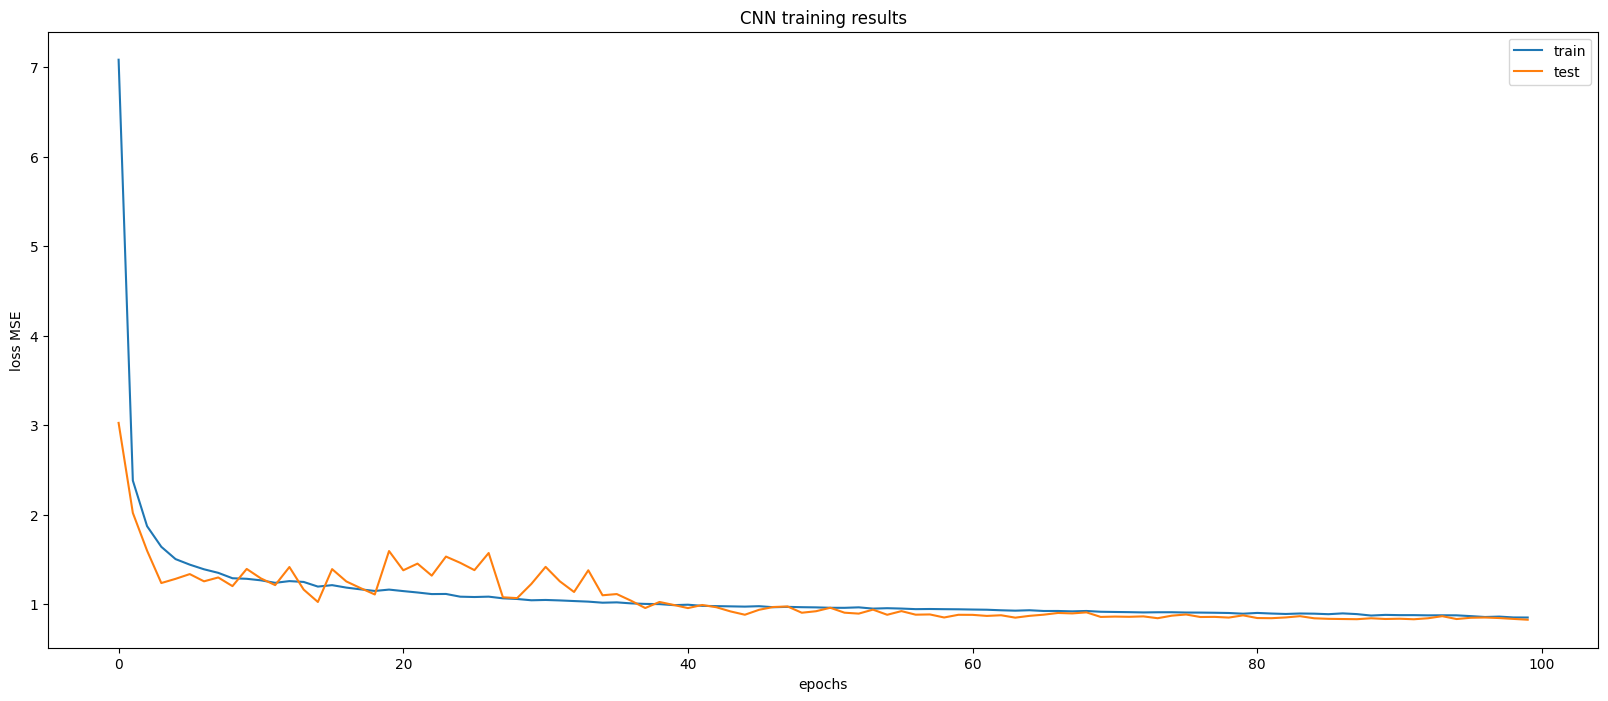

In [11]:
plt.figure(figsize=(20,8))
plt.title('CNN training results')
plt.plot(model_results[0], label='train')
plt.plot(model_results[1], label='test')
plt.ylabel('loss MSE')
plt.xlabel('epochs')
plt.legend()

In [12]:
torch.save(model.state_dict(), 'CNN_class_pred.tar')

# Check model results on validation dataset

In [67]:
df_val = pd.DataFrame(columns=['movieId','userId','rating','predicted'])

In [68]:
df_val

,movieId,userId,rating,predicted


In [69]:
model.eval()

list_1 = []
list_2 = []
list_y = []
list_scores = []

loss_list = []
with torch.no_grad():
    for x, y, _1, _2 in valid_loader:

        x = x.to(device=device)
        y = y.unsqueeze(1).to(device=device)

        scores = model(x)
        loss = criterion(scores, y)
        
        list_1.extend([np.array(_1)[i] for i in range(4)])
        list_2.extend([np.array(_2)[i] for i in range(4)])
        list_y.extend([np.array(y)[i][0] for i in range(4)])
        list_scores.extend([np.array(scores)[i][0] for i in range(4)])
        loss_list.append(loss)

df_val['movieId'] = list_1
df_val['userId'] = list_2
df_val['rating'] = list_y
df_val['predicted'] = list_scores

In [70]:
df_val = df_val.astype({"movieId": int, "userId": int})

In [71]:
df_val

,movieId,userId,rating,predicted
0,160,4635,2.0,2.798322
1,223,3220,5.0,3.774102
2,508,930,4.0,3.526453
3,256,6691,2.5,3.130558
4,290,2150,4.0,3.123665
...,...,...,...,...
595,117,6468,4.0,3.412635
596,34,2150,3.5,3.271440
597,480,5953,3.0,3.500158
598,364,5131,4.0,3.683122


In [39]:
np.mean(loss_list)

0.87073994

# Check model results on test dataset

In [17]:
model.eval()


df_test = pd.DataFrame(columns=['movieId','userId','rating','predicted'])

list_1 = []
list_2 = []
list_y = []
list_scores = []

loss_list = []
with torch.no_grad():
    for x, y, _1, _2 in test_loader:
        list_test = []
        x = x.to(device=device)
        y = y.unsqueeze(1).to(device=device)

        scores = model(x)
        loss = criterion(scores, y)
        
        list_1.extend([np.array(_1)[i] for i in range(4)])
        list_2.extend([np.array(_2)[i] for i in range(4)])
        list_y.extend([np.array(y)[i][0] for i in range(4)])
        list_scores.extend([np.array(scores)[i][0] for i in range(4)])
        loss_list.append(loss)

df_test['movieId'] = list_1
df_test['userId'] = list_2
df_test['rating'] = list_y
df_test['predicted'] = list_scores

In [18]:
df_test

,movieId,userId,rating,predicted
0,95,3821,2.0,2.983893
1,318,7184,5.0,4.008120
2,65,2629,3.0,2.691984
3,344,5914,3.5,3.144908
4,442,4294,3.5,3.027414
...,...,...,...,...
995,111,295,5.0,3.838141
996,380,2620,3.0,3.153025
997,434,4400,1.0,2.283635
998,337,56,4.0,3.752921


In [20]:
np.mean(loss_list)

0.8268402

# Look at recommendation result

In [72]:
df_val['predicted'] = df_val['predicted'].apply(lambda x: 5 if x >= 4.7 else 4.5 if x >= 4.3 else 4 if x >= 4 else 3.5 if x >= 3.5 else\
                         round(x))

In [73]:
df_val.sort_values(by=['userId','movieId','predicted'])

,movieId,userId,rating,predicted
373,296,42,5.0,3.5
90,6,56,4.5,3.5
580,21,56,3.0,3.5
109,60,56,2.5,3.0
450,70,56,3.0,3.0
...,...,...,...,...
587,19,7235,3.0,3.0
533,480,7250,2.5,3.5
281,19,7263,2.5,3.0
231,97,7263,4.5,3.5


In [74]:
np.mean(df_val['rating']) - np.mean(df_val['predicted'])

0.22916659673055007

# Save validation\test results

In [40]:
df_val.to_parquet('validation_results_CNN.parquet')

In [42]:
df_test.to_parquet('test_results_CNN.parquet')